# Predicting Income Levels Using Machine Learning Techniques

## 1. Title, Name and References

Nhi Cao - 300 367 933

Amrit Sian - 300 340 252

Huy Thuy Dung Nguyen - 300 363 745

### Major references 

Jupyter Notebook 17 Ensemble Methods Example

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

The goal of this project is to determine whether a person makes over 50K a year using the Adult dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult). The dataset contains various demographic, work, and financial attributes, which can be used to develop a predictive model. Identifying individuals who make more than 50K a year can help organizations in targeted marketing, policy planning, and social welfare program allocation.



### Initial Hypotheses

Age is positively correlated with income. Older individuals might have more work experience and higher positions, leading to higher salaries.

Higher education levels will be associated with higher income levels. People with advanced degrees might be more likely to have high-paying jobs.

The number of hours worked per week will be positively correlated with income. Full-time workers might earn more than part-time workers.

Occupation type will have a significant impact on income levels. Certain industries and roles might offer higher salaries than others.

Marital status might influence income levels. Married individuals might have higher combined household incomes, leading to higher reported incomes per person.

Gender might be a significant factor in determining income, given the known gender pay gap that exists in various industries.


As we analyze the dataset, we will test these hypotheses and possibly identify additional factors influencing individuals' income levels.

## 2. Library import and data loading

The Adult dataset was obtained from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Adult. This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization, Silicon Graphics. 


Uploading the file 'adult.csv' into the Jupyter Notebook for processing.

In [1]:
import pandas as pd
import numpy as np

#read the CSV file into the DataFrame 'df'
df = pd.read_csv('Dataset/adult.csv')

#glimpse of data
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


_____

## 3. Dividing Dataset into 2 parts 

The original dataset contains 32,561 instances and 15 attributes. 
For this project, 20% of the data (6,512 instances) will be randomly sampled and set aside to make out-of-sample predictions. The rest 80% of dataset will be used for Model Building, which is 26,049 instances and 15 attributes. 

In [2]:
df1 = df.sample(frac=0.8, random_state=25)
df2 = df.drop(df1.index)

df1.to_csv("Dataset/adult_dataset1.csv")
df2.to_csv("Dataset/adult_dataset2.csv") 
#For this project, 20% of the data (6,512 instances) will be randomly sampled and set aside to make out-of-sample predictions.

df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

print(f"No. of df1 instances: {df1.shape[0]}")
print(f"No. of df2 instances: {df2.shape[0]}")
print('')
print('')
print(df1)
print('')
print('')
print(df2)

No. of df1 instances: 26049
No. of df2 instances: 6512


       age          workclass  fnlwgt      education  education-num  \
0       49   Self-emp-not-inc  211762        HS-grad              9   
1       17            Private  160029           11th              7   
2       22            Private   64292        HS-grad              9   
3       23            Private  181820        HS-grad              9   
4       38            Private   87556      Bachelors             13   
...    ...                ...     ...            ...            ...   
26044   67          State-gov  261203        7th-8th              4   
26045   61       Self-emp-inc  139391   Some-college             10   
26046   33            Private  104509   Some-college             10   
26047   34            Private  418020      Doctorate             16   
26048   63            Private  216413      Bachelors             13   

            marital-status         occupation     relationship    race  \
0       Married-

____

## 4. Data Preparation 

Using the first 80% dataset for model building.

In [3]:
df1.shape

(26049, 15)

Looking at the data-types for all 15 attributes, to have an idea what we will be converting to dummies.

In [4]:
print(df1.info())
print('')
print('')
print(df1.describe())
print('')
print('')
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education-num   26049 non-null  int64 
 5   marital-status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital-gain    26049 non-null  int64 
 11  capital-loss    26049 non-null  int64 
 12  hours-per-week  26049 non-null  int64 
 13  native-country  26049 non-null  object
 14  income          26049 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB
None


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dropping the unwanted attributes, 'education, 'fnlwgt', and 'native-country'.

In [5]:
#dropping the 'education' column, since the 'education-num' column already conveys the same information.
#final weight is irrelevant for the classification task. this is the number of people the census believes the entry represents
#There are many categories for 'native_country' -> a high dimensionality in dataset which makes it harder for some models to learn effectively and may lead to overfitting. 
df1.drop(['education', 'fnlwgt', 'native-country'], axis=1, inplace=True)

df1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,49,Self-emp-not-inc,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,>50K
1,17,Private,7,Never-married,Other-service,Other-relative,White,Female,0,0,22,<=50K
2,22,Private,9,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,<=50K
3,23,Private,9,Separated,Craft-repair,Own-child,White,Male,0,0,53,<=50K
4,38,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
26044,67,State-gov,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,35,<=50K
26045,61,Self-emp-inc,10,Married-civ-spouse,Sales,Husband,White,Male,0,1902,35,>50K
26046,33,Private,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
26047,34,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,>50K


Let's have a look on the attributes info again

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   education-num   26049 non-null  int64 
 3   marital-status  26049 non-null  object
 4   occupation      26049 non-null  object
 5   relationship    26049 non-null  object
 6   race            26049 non-null  object
 7   sex             26049 non-null  object
 8   capital-gain    26049 non-null  int64 
 9   capital-loss    26049 non-null  int64 
 10  hours-per-week  26049 non-null  int64 
 11  income          26049 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.4+ MB


Dropping the rows with missing values, which in this dataset is not empty space but ' ?'.

In [7]:
#this dataset contains missing values represented by question marks (' ?'). 
# Replace ' ?' with NaN to identify missing values
df1.replace(' ?', np.nan, inplace=True)

# Drop rows with any missing values
df1 = df1.dropna()

df1.shape

(24567, 12)

Let's check if there is any ' ?' or 'NaN' value in the dataset

In [8]:
# Check for the presence of '?' in the dataset
print("Presence of ' ?' in each column:")
print(df1.apply(lambda x: x == '?').sum())

# Check for the presence of NaN values in the dataset
print("Presence of NaN in each column:")
print(df1.isna().sum())


Presence of ' ?' in each column:
age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64
Presence of NaN in each column:
age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64


Reset the index

In [9]:
# Re-index the dataframe
df1 = df1.reset_index(drop=True)
df1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,49,Self-emp-not-inc,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,>50K
1,17,Private,7,Never-married,Other-service,Other-relative,White,Female,0,0,22,<=50K
2,22,Private,9,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,<=50K
3,23,Private,9,Separated,Craft-repair,Own-child,White,Male,0,0,53,<=50K
4,38,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
24562,67,State-gov,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,35,<=50K
24563,61,Self-emp-inc,10,Married-civ-spouse,Sales,Husband,White,Male,0,1902,35,>50K
24564,33,Private,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
24565,34,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,>50K


Create dummy variables for categorical attributes and drop the first column.
Also replace symbols and empty space to have headings of coumns follow naming convention.

In [10]:
# Create dummy variables
categorical_columns = df1.select_dtypes("object").columns
df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

# Rename columns
df1.columns = df1.columns.str.replace("-", "_")
df1.columns = df1.columns.str.replace(" ", "")
df1.columns = df1.columns.str.replace(">", "over")

Get the info of the new changed dataset.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24567 entries, 0 to 24566
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   24567 non-null  int64
 1   education_num                         24567 non-null  int64
 2   capital_gain                          24567 non-null  int64
 3   capital_loss                          24567 non-null  int64
 4   hours_per_week                        24567 non-null  int64
 5   workclass_Local_gov                   24567 non-null  uint8
 6   workclass_Private                     24567 non-null  uint8
 7   workclass_Self_emp_inc                24567 non-null  uint8
 8   workclass_Self_emp_not_inc            24567 non-null  uint8
 9   workclass_State_gov                   24567 non-null  uint8
 10  workclass_Without_pay                 24567 non-null  uint8
 11  marital_status_Married_AF_spouse      245

Loading the dataset's corr() into corr_matrix to use further for heat map and getting basic information of the dataset prepared. 

In [12]:
corr_matrix = df1.corr()

In [13]:
df1.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,sex_Male,income_over50K
count,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,...,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000
mean,38.454105,10.117963,1094.647902,88.626287,40.912240,0.067407,0.740017,0.036879,0.083079,0.041478,...,0.029755,0.147474,0.105955,0.046241,0.031343,0.094965,0.008141,0.856474,0.679367,0.249888
std,13.139511,2.559256,7394.750362,405.921531,11.961921,0.250732,0.438634,0.188468,0.276007,0.199398,...,0.169915,0.354585,0.307786,0.210011,0.174246,0.293172,0.089861,0.350615,0.466730,0.432957
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df1.head(10)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,sex_Male,income_over50K
0,49,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
1,17,7,0,0,22,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,22,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,23,9,0,0,53,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,38,13,7688,0,55,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
5,32,14,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,48,9,7298,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
7,32,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,54,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,41,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


Plotting the correlation of 41 attributes to each other in a heat map to understand the relations.

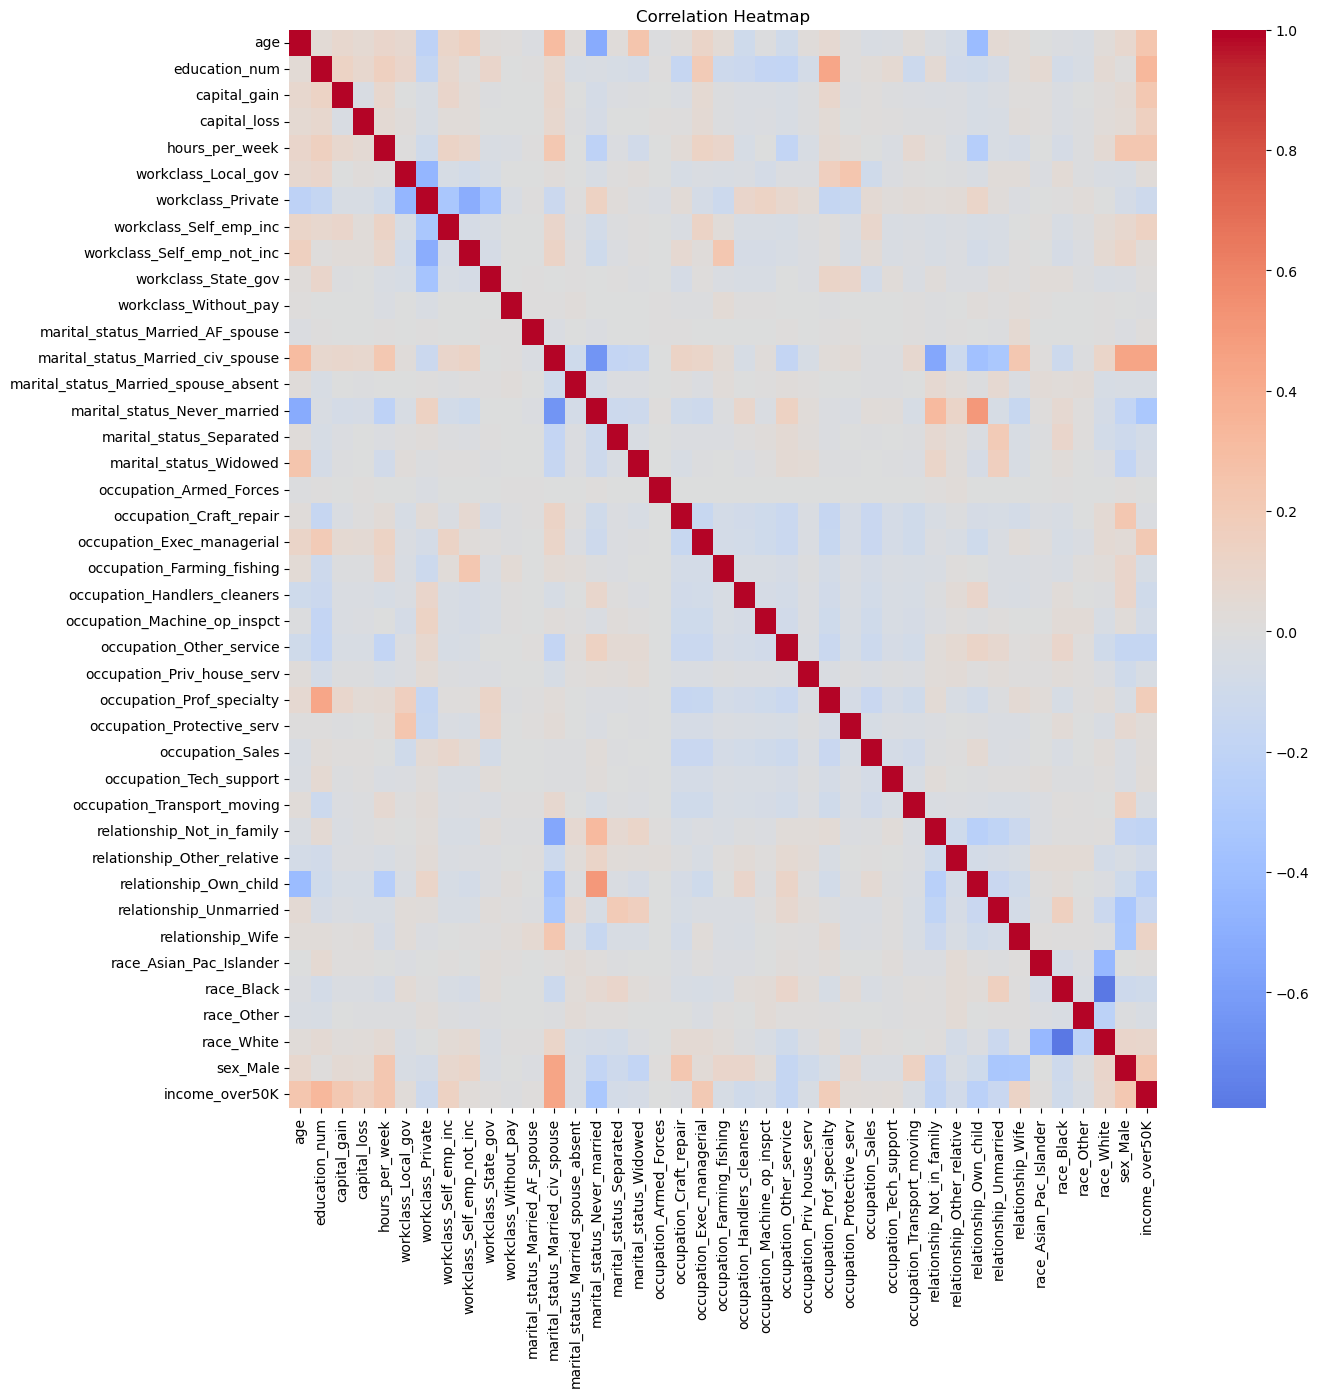

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 14))

# Create a heatmap without annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()



The heat map shows that most of the features have almost no correlation with each other, but still some do have positive and negative correaltions with each other. Specifically seeing 'Income_over50k', positive relations with that.

___

## 5. Model Planning and Implementation

Split the dataset into 2 parts, 75% training and 25% testing datasets to build the model.

In [16]:
from sklearn.model_selection import train_test_split

# Define your features and target
X = df1.drop('income_over50K', axis=1)
y = df1['income_over50K']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (18425, 40)
y_train shape: (18425,)
X_test shape: (6142, 40)
y_test shape: (6142,)


Build a model using Pipeline and Grid Search with 5-fold cross-validation.

The Feature Selection methods to be used are RandomForestClassifier, and LogisticRegression.

The scaling methods to be used are MinMaxScaler, and StandardScaler.

The Classifiers to be used are LogisticRegression, RandomForestClassifier, AdaBoostClassifier, XGBClassifier, and MLPClassifier.

Ensemble techniques to be used are voting_hard and voting_soft.

Using the Pipeline and Gridsearch, we will 28 various combinations with accuracy score.
From this highlest one will be selected. 

This approach allows for an efficient exploration of various models and techniques, ultimately leading to the selection of the most effective model for the given dataset.

In [17]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Feature selection
fs1 = SelectFromModel(RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42))
fs2 = RFE(LogisticRegression(solver='liblinear', random_state=42))

# Scaling
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

# Classifiers
clf1 = LogisticRegression(solver='liblinear', random_state=42)
clf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
clf3 = AdaBoostClassifier(learning_rate=0.1, random_state=42)
clf4 = XGBClassifier(eval_metric='logloss', random_state=42)
clf5 = MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate_init=0.01, random_state=42)
# clf6 = KNeighborsClassifier()
# clf7 = GaussianNB()

estimators = [
    ('lr', clf1),
    ('rf', clf2),
    ('ada', clf3),
    ('xgb', clf4),
    ('mlp', clf5)
]

# Voting Classifiers
voting_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_soft = VotingClassifier(estimators=estimators, voting='soft')

# Bagging Classifier - We need to comment out this clf because it doesn't run on the school's computer which uses the older version of scikit-learn
# bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42), 
#                                 n_estimators=10, max_samples=0.5, max_features=0.5, bootstrap=True, bootstrap_features=False, 
#                                 oob_score=True, random_state=42)

# Define pipeline and search space
pipe = Pipeline([('fs', fs1), ('scaler', scaler1), ('clf', clf1)])
param_grid = [
    {'fs': [fs1, fs2], 'scaler': [scaler1, scaler2],
     'clf': [clf1, clf2, clf3, clf4, clf5, voting_hard, voting_soft]}
]

# Grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid.fit(X_train, y_train)

# Print best combination
print("Best combination from training set:", grid.best_params_)
print("Best cross-validation score from training set::", grid.best_score_)
print("-------------------------------------------------------------------------------------------------------------------")
print(" ")

# Get the list of parameter combinations
params_list = grid.cv_results_['params']

# Store the names and scores of each combination
names = []
scores = []

for idx, params in enumerate(params_list): #idx is index (a loop counter)
    # Create a pipeline with the current combination of parameters
    pipe = Pipeline([
        ('fs', params['fs']),
        ('scaler', params['scaler']),
        ('clf', params['clf'])
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    # Evaluate the pipeline on the test set
    score = pipe.score(X_test, y_test)

    # Append the name and score to the lists
    names.append(f"Combination {idx + 1}")
    scores.append(score)

    # Print the results
    print(f"Combination {idx + 1}: {params}")
    print(f"Model score: {score:.3f}\n")
    print("-------------------------------------------------------------------------------------------------------------------")

# Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names, scores), columns=['Combination', 'Accuracy Score'])

sorted_scores_df = scores_df.sort_values(by='Accuracy Score', ascending=False)
print(sorted_scores_df)



Best combination from training set: {'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...), 'fs': SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                                 random_state=42)), 'scaler': MinMaxScaler()}
Best cross-validation

Combination 16: {'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...), 'fs': RFE(estimator=LogisticRegression(random_state=42, solver='liblinear')), 'scaler': StandardScaler()}
Model score: 0.818

----------------------------------------------------------------------------------------------

Combination 24: {'clf': VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_by...
                   

Combination 28: {'clf': VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_by...
                   

####  Combination 13,14, 25 share similar top result. The combination we will move forward with is Combination 13, which is also the grid.best_params_ , best combination from GridsearchCV with the training set.

Now we will use GridSearchCV to find the optimal hyperparameters for the XGBClassifier with SelectFromModel and MinMaxScaler as our best combination. It will save time and resources by evaluating multiple models in parallel (using the n_jobs parameter).

In [18]:
# Feature selection
fs1 = SelectFromModel(RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42))

# Scaling
scaler1 = MinMaxScaler()

# Classifier
clf4 = XGBClassifier(eval_metric='logloss', random_state=42)

# Define pipeline
pipe = Pipeline([('fs', fs1), ('scaler', scaler1), ('clf', clf4)])

# Define hyperparameter search space
param_grid = {
    'fs__estimator': [RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)],
    'scaler': [scaler1],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [50, 100, 150],
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV on the training data
grid.fit(X_train, y_train)

# Print the best combination of hyperparameters
print("Best combination of hyperparameters:", grid.best_params_) #grid.best_params_ only contains the optimal hyperparameter values
print("Best cross-validation score:", grid.best_score_)

# Evaluate the model on the test set
best_model = grid.best_estimator_ #grid.best_estimator_ gives ready-to-use model with optimal hyperparameters
test_score = best_model.score(X_test, y_test)
print("Test score for the best model:", test_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best combination of hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 150, 'fs__estimator': RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42), 'scaler': MinMaxScaler()}
Best cross-validation score: 0.8548168249660787
Test score for the best model: 0.8573754477368936


_____

## 6.Results Interpretation and Implications

Model performance metrics (accuracy_score, classification_report, confusion_matrix, ROC curve) provide a comprehensive assessment of the model's performance, allowing for the evaluation of the hypotheses and modeling objectives. It offer insights into the model's ability to predict income levels accurately and how well it can generalize to new data.

Model accuracy: 0.857


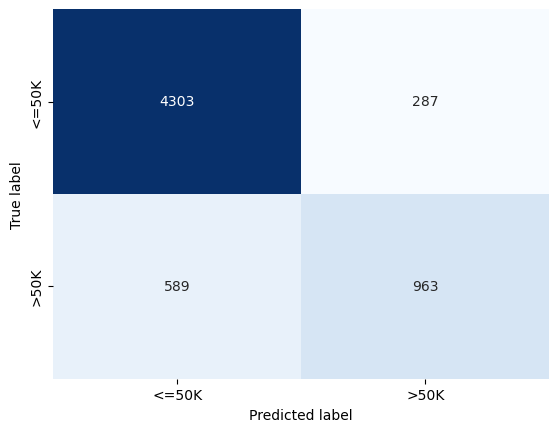

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4590
           1       0.77      0.62      0.69      1552

    accuracy                           0.86      6142
   macro avg       0.82      0.78      0.80      6142
weighted avg       0.85      0.86      0.85      6142



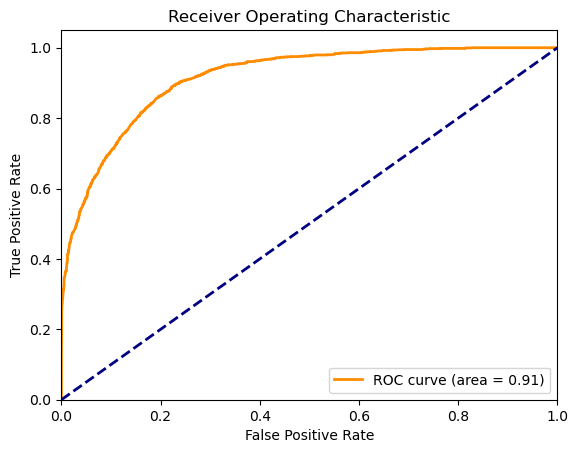

In [19]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

# Feature selection, scaling, and classifiers
fs = SelectFromModel(RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42))
scaler = MinMaxScaler()
clf = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=150, eval_metric='logloss', random_state=42)

# Create a pipeline with the specific combination
best_pipe = Pipeline([
    ('fs', fs),
    ('scaler', scaler),
    ('clf', clf)
])

# Fit the best pipeline to the training data
best_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_pipe.predict(X_test)
y_pred_proba = best_pipe.predict_proba(X_test)[:, 1]

# Calculate the model's accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {model_accuracy:.3f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Performance metrics: Accuracy of 0.857 and weighted average F1-score of 0.85, indicating a reasonably good performance.

Confusion matrix: 4303 TN, 963 TP, 287 FP, and 589 FN, suggesting a conservative approach in predicting '>50K' class, with some misclassifications.

ROC-AUC curve: AUC of 0.91, suggesting good discriminative power of the model.

### Does the model avoid intolerable mistakes?

In the confusion matrix, we have:

False Positives: 287 - The model incorrectly predicts that an individual earns >50K when they actually earn <=50K.

False Negatives: 589 - The model incorrectly predicts that an individual earns <=50K when they actually earn >50K.

The impact of these mistakes depends on the specific application of the model. For instance, if the model is used to determine eligibility for financial aid or social benefits, false positives might lead to individuals receiving aid they do not actually qualify for, while false negatives could prevent deserving individuals from receiving the assistance they need. In another example, if the model is used by a marketing team to target high-income customers, false positives could result in wasted marketing resources on lower-income individuals, while false negatives could lead to missed opportunities with potential high-income customers. Take credit scoring as a third example. If the model is used as a component in credit scoring systems, false positives might cause lenders to overestimate the creditworthiness of individuals with lower incomes, potentially increasing the risk of default, while false negatives could prevent higher-income individuals from accessing credit at favorable terms.

To determine if these mistakes are tolerable, the stakeholders and domain experts need to assess the cost and consequences of these errors in the context of their specific application. If the costs and consequences are deemed too high, further model refinement or alternative approaches may be necessary to minimize these errors and create a more accurate and reliable model for the intended use case.

Feature importances from XGBClassifier: 

Quantify the relative importance of each feature in the model, allowing for assessment of the hypotheses and identification of the most significant factors influencing income.

Offer insights into which features have the strongest impact on the model's predictions and help validate or refute the initial hypotheses.

In [20]:
# Get the feature importances from the XGBClassifier
xgb_feature_importances = best_pipe.named_steps['clf'].feature_importances_

# Get the selected feature names
xgb_feature_names = X_train.columns[best_pipe.named_steps['fs'].get_support()]

# Combine feature importances and names into a DataFrame
importance_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)


                             Feature  Importance
5  marital_status_Married_civ_spouse    0.642812
1                      education_num    0.096745
2                       capital_gain    0.087856
6         occupation_Exec_managerial    0.053241
3                       capital_loss    0.047009
0                                age    0.027213
4                     hours_per_week    0.022747
7                           sex_Male    0.022377


___

## 7.Out-of-sample Predictions

Using the rest of the 20% of the original dataset, we willl be doing out_of_sample predictions. First the dataset saved as 'adult_dataset2.csv' will be loaded into the jupyter notebook again. As it is the same dataset, we will be using same coding for data preparation. The prepared dataset will be saved as 'out_of_sample_data'.

In [21]:
# Load the out-of-sample data
out_of_sample_data = pd.read_csv('Dataset/adult_dataset2.csv', index_col=[0])
print(out_of_sample_data.shape)
print('')
print('')

#dropping irrelevant columns
out_of_sample_data.drop(['education', 'fnlwgt', 'native-country'], axis=1, inplace=True)

# Replace ' ?' with NaN to identify missing values
out_of_sample_data.replace(' ?', np.nan, inplace=True)

# Drop rows with any missing values
out_of_sample_data = out_of_sample_data.dropna()

# Re-index the dataframe
out_of_sample_data = out_of_sample_data.reset_index(drop=True)

# Create dummy variables
categorical_columns = out_of_sample_data.select_dtypes("object").columns
out_of_sample_data = pd.get_dummies(out_of_sample_data, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

# Rename columns
out_of_sample_data.columns = out_of_sample_data.columns.str.replace("-", "_")
out_of_sample_data.columns = out_of_sample_data.columns.str.replace(" ", "")
out_of_sample_data.columns = out_of_sample_data.columns.str.replace(">", "over")

#out_of_sample_data dataset 
print(out_of_sample_data.shape)
print('')
print('')
print(out_of_sample_data.info())
out_of_sample_data.head()




(6512, 15)


(6151, 41)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   6151 non-null   int64
 1   education_num                         6151 non-null   int64
 2   capital_gain                          6151 non-null   int64
 3   capital_loss                          6151 non-null   int64
 4   hours_per_week                        6151 non-null   int64
 5   workclass_Local_gov                   6151 non-null   uint8
 6   workclass_Private                     6151 non-null   uint8
 7   workclass_Self_emp_inc                6151 non-null   uint8
 8   workclass_Self_emp_not_inc            6151 non-null   uint8
 9   workclass_State_gov                   6151 non-null   uint8
 10  workclass_Without_pay                 6151 non-null   uint8
 11  marital_status_Ma

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,sex_Male,income_over50K
0,52,9,0,0,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
1,40,11,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,45,13,0,1408,40,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,48,7,0,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,48,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


Split the dataset into 2 parts, 75% training and 25% testing datasets to be used for predictions. Using the same model built above, accuracy score will be calculated. 

On the newdataset, Confusion Matrix, Classification Report, and ROC AUC Curve will be drawn.

Out-of-sample accuracy: 0.865


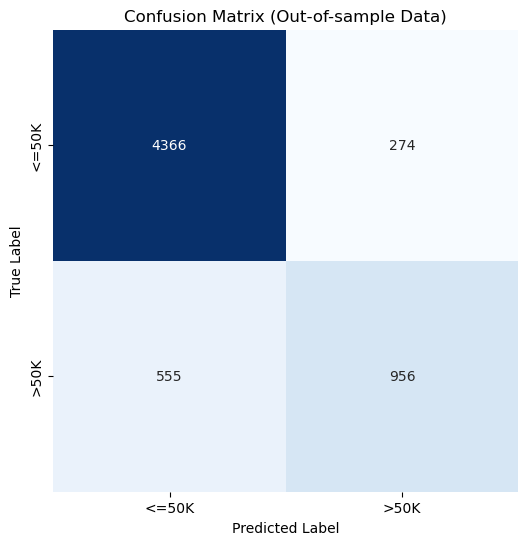

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4640
           1       0.78      0.63      0.70      1511

    accuracy                           0.87      6151
   macro avg       0.83      0.79      0.81      6151
weighted avg       0.86      0.87      0.86      6151



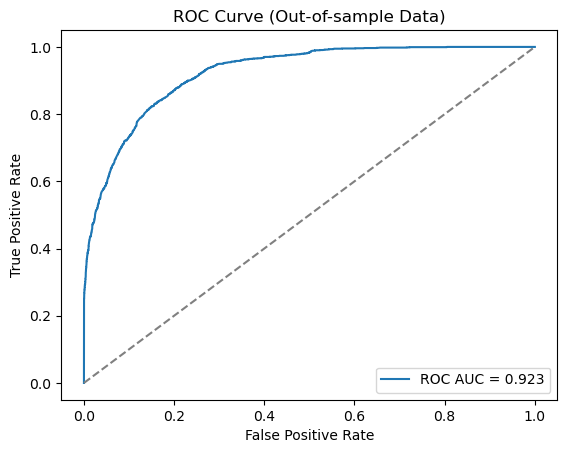

In [22]:
# Define your features and target
X_s = out_of_sample_data.drop('income_over50K', axis=1)
y_s = out_of_sample_data['income_over50K']

# Make predictions on the preprocessed out-of-sample data
out_of_sample_predictions = best_pipe.predict(X_s)

# Calculate the accuracy of the predictions
out_of_sample_accuracy = accuracy_score(y_s, out_of_sample_predictions) #y_pred
print(f"Out-of-sample accuracy: {out_of_sample_accuracy:.3f}")



# Compute the confusion matrix
cm = confusion_matrix(y_s, out_of_sample_predictions) #y_pred

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix (Out-of-sample Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print a classification report for a more detailed evaluation
print(classification_report(y_s, out_of_sample_predictions))

# Calculate the ROC AUC score
out_of_sample_roc_auc = roc_auc_score(y_s, best_pipe.predict_proba(X_s)[:, 1])

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_s, best_pipe.predict_proba(X_s)[:, 1])
plt.plot(fpr, tpr, label=f"ROC AUC = {out_of_sample_roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Out-of-sample Data)')
plt.legend()
plt.show()


Performance metrics: Accuracy of 0.865, indicating a reasonably good performance on the sample dataset.

Confusion matrix: 4366 TN, 956 TP, 274 FP, and 555 FN, suggesting a conservative approach in predicting '>50K' class, with some misclassifications.

ROC-AUC curve: AUC of 0.923, suggesting good discriminative power of the model.

___

# Member Contribution

The peer evaluation matrix with scores from 1 to 4.

|        Evaluator / Evaluatee     | Member 1 (Nhi Cao) | Member 2 (Amrit Sian) | Member 3 (Huy Thuy Dung Nguyen) |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|         Member 1 (Nhi Cao)       |          /         |            4          |                4                |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|        Member 2 (Amrit Sian)     |          4         |          /            |                 4               |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|  Member 3 (Huy Thuy Dung Nguyen) |          4         |          4            |                  /              |